In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [18]:
features = df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP', 'DEALSIZE', 'COUNTRY', 'PRODUCTLINE']]
features.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE,COUNTRY,PRODUCTLINE
0,10107,30,95.70,2,2871.00,1,2,2003,95,Small,USA,Motorcycles
1,10121,34,81.35,5,2765.90,2,5,2003,95,Small,France,Motorcycles
2,10134,41,94.74,2,3884.34,3,7,2003,95,Medium,France,Motorcycles
3,10145,45,83.26,6,3746.70,3,8,2003,95,Medium,USA,Motorcycles
4,10159,49,100.00,14,5205.27,4,10,2003,95,Medium,USA,Motorcycles


In [19]:
features.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE,COUNTRY,PRODUCTLINE
0,10107,30,95.70,2,2871.00,1,2,2003,95,Small,USA,Motorcycles
1,10121,34,81.35,5,2765.90,2,5,2003,95,Small,France,Motorcycles
2,10134,41,94.74,2,3884.34,3,7,2003,95,Medium,France,Motorcycles
3,10145,45,83.26,6,3746.70,3,8,2003,95,Medium,USA,Motorcycles
4,10159,49,100.00,14,5205.27,4,10,2003,95,Medium,USA,Motorcycles


In [20]:
productline = pd.get_dummies(df["PRODUCTLINE"])
country = pd.get_dummies(df["COUNTRY"])
dealsize = pd.get_dummies(df["DEALSIZE"])

In [21]:
df_new = pd.concat([features, productline, country,dealsize], axis = 1)

In [22]:
df_new.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE,...,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
0,10107,30,95.70,2,2871.00,1,2,2003,95,Small,...,False,False,False,False,False,False,True,False,False,True
1,10121,34,81.35,5,2765.90,2,5,2003,95,Small,...,False,False,False,False,False,False,False,False,False,True
2,10134,41,94.74,2,3884.34,3,7,2003,95,Medium,...,False,False,False,False,False,False,False,False,True,False
3,10145,45,83.26,6,3746.70,3,8,2003,95,Medium,...,False,False,False,False,False,False,True,False,True,False
4,10159,49,100.00,14,5205.27,4,10,2003,95,Medium,...,False,False,False,False,False,False,True,False,True,False


In [23]:
df_new.drop(["PRODUCTLINE", "COUNTRY", "DEALSIZE"], axis = 1, inplace = True)

In [24]:
df_new.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Classic Cars,...,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
0,10107,30,95.70,2,2871.00,1,2,2003,95,False,...,False,False,False,False,False,False,True,False,False,True
1,10121,34,81.35,5,2765.90,2,5,2003,95,False,...,False,False,False,False,False,False,False,False,False,True
2,10134,41,94.74,2,3884.34,3,7,2003,95,False,...,False,False,False,False,False,False,False,False,True,False
3,10145,45,83.26,6,3746.70,3,8,2003,95,False,...,False,False,False,False,False,False,True,False,True,False
4,10159,49,100.00,14,5205.27,4,10,2003,95,False,...,False,False,False,False,False,False,True,False,True,False


In [25]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df_new)
    inertia.append(km.inertia_)

C:\Users\SHRINIKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SHRINIKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SHRINIKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SHRINIKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

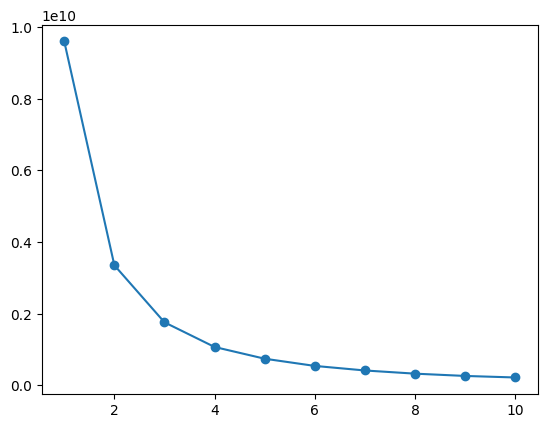

In [27]:
plt.plot(range(1, 11), inertia, marker = 'o')

In [29]:
optimal_k = 4
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit_predict(df_new)

C:\Users\SHRINIKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 3, 1, 0])

In [31]:
df_new['k_cluster'] = kmeans.fit_predict(df_new)

C:\Users\SHRINIKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
df_new.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Classic Cars,...,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,k_cluster
0,10107,30,95.70,2,2871.00,1,2,2003,95,False,...,False,False,False,False,False,True,False,False,True,0
1,10121,34,81.35,5,2765.90,2,5,2003,95,False,...,False,False,False,False,False,False,False,False,True,0
2,10134,41,94.74,2,3884.34,3,7,2003,95,False,...,False,False,False,False,False,False,False,True,False,0
3,10145,45,83.26,6,3746.70,3,8,2003,95,False,...,False,False,False,False,False,True,False,True,False,0
4,10159,49,100.00,14,5205.27,4,10,2003,95,False,...,False,False,False,False,False,True,False,True,False,3


In [33]:
zero, one, two, three = 0,0,0,0

for i in range(len(df_new):
               if df_new['k_cluster'] == 0:
                   zero

SyntaxError: expected ':' (3977352208.py, line 3)